## Homework 3: Back-propagation Implementation

1. Implement the sofmax function. 5 pints

2. Implement the Layer class. 10 points.

3. Complete the NN class. 70 points.

    3.1: implement the 'add' function. 5 points
    
    3.2: implement the cross-entropy loss. 5 points 
    
    3.3: implement the forward propagation process. 5 points.
    
    3.4: implement the prediction function. 5 points
    
    3.5: complete 'train' function. 10 points.
    
    3.6: implement the BP algorithm. 30 points
    
    3.7: update all weights and bias. 5 points
    
    3.8: calculate the accuracy. 5 points 
    
4. Evaluation. 15 points.

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [30]:
## load the digits dataset
def load_digits(show_sample = True):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    #show first 100 images
    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
        plt.show()
        
    x_train_1 = np.reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
    x_test_1 = np.reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])
    
    return x_train_1, y_train, x_test_1, y_test

# x_train, y_train, x_test, y_test = load_wine()

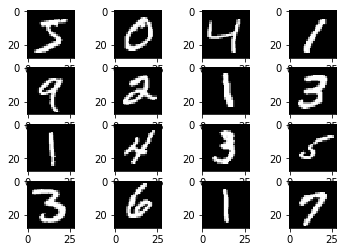

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000, 784)


In [31]:
x_train_1, y_train, x_test_1, y_test = load_digits(show_sample = True)
print(x_train_1)
print(x_test_1)
print(x_test_1.shape)

In [32]:
## Task 1: Activation functions: implement the softmax function. 5 points
def sigm(z):
    return 1/(1 + np.exp(-z))

def dsigm(z):
    return sigm(z)*(1 - sigm(z))

def softmax(z):
     
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum()
    ''' softmax function for the output layer

        z: is a vector
    '''
def dsoftmax(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)
     

In [33]:
## Task 2: create the layer class. 10 points
class Layer:
    """ Regular densely-connected NN layer   
    """
    
    def __init__(self, units, input_dim, activation = None): # 5 points
        '''initialize weights and bias
            
            units: the number of hidden nodes
        '''
        self.units = units
        self.activation = activation
        self.input_dim = input_dim
        
        np.random.seed(0)
        self.W = np.random.randn(units,input_dim) *0.01
        self.bias = np.zeros(shape = (units,1))
        #m = self.output.shape[1]
        #self.gW = np.dot(self.output, self.activation.T) / m  # gradient of wights
        #self.gb = np.squeeze(np.sum(self.net, axis=1, keepdims=True)) / m # gradient of bias
        
    def run(self, inputs): # 5 points
        ''' calculate the net input and activation output of the current layer
        
            inputs=(n_sample * n_features)
          
            return the activation output
        '''
        self.net = np.dot(inputs,self.W.T) +self.bias.T 
        
        if self.activation is 'sigm':
            self.output = sigm(self.net)
            
        if self.activation is 'softmax':
            self.output = softmax(self.net)
            
        return self.output

In [34]:
layer = Layer(units = 784, input_dim = x_train_1.shape[1],activation ="sigm")
H1 = layer.run(x_train_1)
print('result of the first layer:\r\n',H1)
print(H1.shape)


result of the first layer:
 [[2.12472070e-11 1.00000000e+00 5.98734735e-01 ... 1.26604067e-02
  6.32019104e-12 1.00000000e+00]
 [1.42011870e-25 9.99999982e-01 1.23066190e-01 ... 3.68623522e-01
  7.68141898e-01 1.00000000e+00]
 [3.03674544e-09 1.00000000e+00 1.80896518e-05 ... 1.80793765e-08
  8.57197675e-10 6.10649898e-03]
 ...
 [5.95058566e-08 9.99999027e-01 2.33927833e-01 ... 9.99999965e-01
  3.08525266e-07 1.00000000e+00]
 [1.35156077e-16 9.99999999e-01 8.66232770e-06 ... 1.00000000e+00
  2.66024188e-06 1.00000000e+00]
 [4.81145060e-14 9.99997879e-01 3.55108083e-08 ... 7.43429015e-01
  2.59183279e-09 1.00000000e+00]]
(60000, 784)


In [35]:
layer2 = Layer(units = 392, input_dim = H1.shape[1],activation ="sigm")
H2 = layer2.run(H1)
print('reslt of the second:\r\n',H2)
print(H2.shape)

reslt of the second:
 [[0.51324966 0.49321513 0.47362377 ... 0.49800109 0.5210448  0.48485808]
 [0.44779754 0.48459644 0.47380772 ... 0.56228431 0.51864563 0.47961255]
 [0.51110307 0.54522032 0.48739894 ... 0.50361783 0.50435335 0.53474819]
 ...
 [0.48203206 0.47198881 0.43329323 ... 0.51583808 0.48097285 0.5133524 ]
 [0.45133045 0.50875927 0.42949681 ... 0.54099552 0.53996663 0.51672872]
 [0.46472485 0.50460533 0.45453509 ... 0.54541892 0.49271623 0.54910049]]
(60000, 392)


In [36]:
layer3 = Layer(units = 10, input_dim = H2.shape[1],activation ="softmax")
H3 = layer3.run(H2)
print('reslt of the second:\r\n',H2)
print(H2.shape)

reslt of the second:
 [[0.51324966 0.49321513 0.47362377 ... 0.49800109 0.5210448  0.48485808]
 [0.44779754 0.48459644 0.47380772 ... 0.56228431 0.51864563 0.47961255]
 [0.51110307 0.54522032 0.48739894 ... 0.50361783 0.50435335 0.53474819]
 ...
 [0.48203206 0.47198881 0.43329323 ... 0.51583808 0.48097285 0.5133524 ]
 [0.45133045 0.50875927 0.42949681 ... 0.54099552 0.53996663 0.51672872]
 [0.46472485 0.50460533 0.45453509 ... 0.54541892 0.49271623 0.54910049]]
(60000, 392)


In [37]:
## Task 3: complete the following NN class. 60 points
class NeuralNetwork:
    
    def __init__(self):
        self.layers=[]
        
    # Task 3.1: implement the 'add' function. 5 points     
    def add(self, units, input_dim, activation = 'sigm'):
        '''add one layer to neural network
            
            units: the number of nodes of current layer
            input_dim: input dimension (the number of nodes of the previous layer)
            activation: the name of the activation function
        '''
        
        layer = Layer(units,input_dim,activation = 'sigm') 
        self.layers.append(layer)
        
        
        
    # Task 3.2: implement the cross-entropy loss. 5 points   
    def loss(self, y_pred, y):
        '''loss function: 1/n_samples*sum_samples(sum_output(-y_i*log(y_pred_i)))
        
            y_pred: predictions(n_samples * 10)
            y: target(one-hot vectors: n_samples * 10)
        '''
        
        m = y.shape[0] # the number of samples
        #y_pred =  
        y = y.argmax(axis=1) 
        log_likelihood = -np.log(y_pred[range(m),y])
        loss = np.sum(log_likelihood) / m
       
        return loss
        
      
    # Task 3.3: implement the forward propagation process. 5 points.
    def forward_prop(self, inputs):
        '''forward propagation calculates net input and output for each layer
        
            inputs: input data(n_samples * n_features)
            return the output of the last layer
            
        '''
        
        nLayers = len(self.layers)
        
        for i in range(nLayers):
            out = self.layers[i].run(inputs)
            inputs = out
            #
            #
            
        return out
    
    # Task 3.4: implement the prediction function. 5 points
    def predict_class(self, x):
        '''predict class lables (0, 1, 2, 3, ..., 9) for data samples
        
            x: input(n_samples * n_features) 
            return class labels
        '''
        out = forward_prop(x) 
        return np.argmax(out, axis = 1) # output decoding
        
        #y_pred = self.forward_prop(x)
        #class_labels = np.round(y_pred)
        #return class_labels

    # Task 3.5: complete the following 'train' function. 10 points.
    def train(self, inputs, targets, lr = 0.001, batch_size = 32, epochs = 50):
        '''implement the SGD process and use Back-Propagation algorithm to calculate gradients 
        
            inputs: training samples
            targets: training targets
            lr: learning rate
            batch_size: batch size
            epochs: max number of epochs
        '''
        
        m = len(targets)  
        #print(m, targets.shape)
        loss_hist = np.zeros(epochs)
        
        for i in range(epochs):
            #shuffle the data
            idx = np.arange(m)
            np.random.shuffle(idx)
            inputs = inputs[idx]
            targets = targets[idx]
            
            for b in range(int(m/batch_size)):
                b_start= b*batch_size
                b_end = min((b+1)*batch_size, m)
                
                x_batch = inputs[b_start:b_end, :]
                y_batch = targets[b_start:b_end, :]
                #gradients = 2/batch_size *x_batch.T.dot(x_batch(self.W) - y_batch)
                out = self.forward_prop(x_batch)
                gradient = self.BP(x_batch,y_batch)
                lr = lr*0.9
                update_weights = self.updateWeights(lr)
                
                
                
                # 1. run forward propagation
                
                # 2. call BP to calculate all gradients
               
                # 3. update all weights and bias
                
                
             
            # 4. calculate and record the loss of current epoch
            #
            #loss_hist[i] = 
            
            # 5. print out the loss of current epoch
            #
            y_pred = self.forward_prop(inputs)
            loss_hist[i] = self.loss(y_pred, targets)
            print('epoch:', i, loss_hist[i])

            
        return loss_hist
   
    # Task 3.6: implement the BP algorithm. 30 points
    def BP(self, x, y):
        ''' Back-propagation algorithm
        
            x: input samples (n_samples * n_features)
            y: ont-hot targets (n_samples * 10)
        '''
        
        nLayers = len(self.layers)
        m_batch = x.shape[0]
        
        # 1. calculate gradients for the hidden-to-output layer. 15 points
        # idx >= 1
        idx = nLayers - 1
        h[idx+1] = self.output[idx] - y
        net[idx+1] = (1 / m) * np.dot(h[idx+1], self.output[idx].T)
        o[idx+1] = (1 / m) * np.sum(h[idx+1], axis=1, keepdims=True)
        #h = 
        #net = 
        #o = 

        
        # 2. calculate gradients for the input-to-hidden layers. 15 points
        h[idx] = np.multiply(np.dot(self.W[idx+1].T, h[idx+1]), 1 - np.power(self.output[idx], 2))
        net[idx] = (1 / m) * np.dot(h[idx], x.T)
        o[idx] = (1 / m) * np.sum(h[idx], axis=1, keepdims=True)
        
        grads = {"h[idx]" :h[idx],
                "net[idx]":net[idx],
                 "o[idx]" :o[idx],
                 "h[idx+1]" :h[idx+1],
                "net[idx+1]":net[idx+1],
                 "o[idx+1]" :o[idx+1]
                 
                }
        return grads
        
            
    # Task 3.7: update all weights and bias. 5 points            
    def updateWeights(self, lr):
        nLayers = len(self.layers)
        for i in range(nLayers):
            self.layers[i].W = self.layers[i].W - lr* net[idx]
            self.layers[i].bias  = self.layers[i].bias - lr * o[idx]
            
            #self.layers[i].W  =
            #self.layers[i].bias =  
            
    # Task 3.8: calculate the accuracy. 5 points           
    def Acc(self, y, y_pred):
        '''accuracy
            
            y: target: categorical values (0, 1, ...9). n_samples * 1
            y_pred: prediction: 0,1,2, ..9. n_samples *1
        '''
        my_accuracy = float((np.dot(y, y_pred.T) + np.dot(1 - y, 1 - y_pred.T)) / float(y.size) * 100)
        print ('Accuracy: %d' % float((np.dot(y, y_pred.T) + np.dot(1 - y, 1 - y_pred.T)) / float(y.size) * 100) + '%')
        
        return my_accuracy
        #   

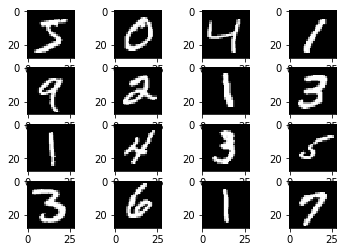

None


AttributeError: 'NeuralNetwork' object has no attribute 'output'

In [39]:
# Task 4: Evaluation. 15 points
   
# 1. create a one-hidden layer NN. 
#    The hidden layer activation is sigmoid and the outputlayer activation is the softmax. 
#    5 points
x_train, y_train, x_test, y_test = load_digits(show_sample = True)
y_train_onehot = keras.utils.to_categorical(y_train)
nn = NeuralNetwork()
t = nn.add(784, x_train.shape[1], 'sigm')
print(t)
#nn.add(10, 784, 'softmax')
#y_train_onehot = keras.utils.to_categorical(y_train)
nn.train(x_train, y_train_onehot, lr = 0.001, batch_size = 1, epochs = 10)



#nn.add()
#nn.add()

# 2. train the NN. 

# 

# 3. calculte and print out the test and training accuracy. 10 points
